
# Individual Storm Analysis
This sample script illustrates how to retrieve a single storm from the HURDAT2 dataset, and make plots and analyses of this storm.


In [1]:
import tropycal.tracks as tracks
import datetime as dt

## HURTDAT2 Dataset
Let's start by creating an instance of a TrackDataset object. By default, this reads in the HURDAT2 dataset from the National Hurricane  Center (NHC) website. For this example we'll be using the HURDAT2 dataset over the North Atlantic basin.

HURDAT data is not available for the most recent hurricane seasons. To include the latest data up through today, the "include_btk" flag  would need to be set to True, which reads in preliminary best track data from the NHC website.



In [2]:
basin = tracks.TrackDataset(basin='north_atlantic',source='hurdat',include_btk=False)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (2.92 seconds)


## Individual storm analysis
Individual storms can be retrieved from the dataset by calling the ``get_storm()`` function, which returns an instance of a Storm object. This can be done by either entering a tuple containing the storm name and year, or by the standard tropical cyclone ID (e.g., "AL012019").

Let's retrieve an instance of Hurricane Michael from 2018:



In [3]:
storm = basin.get_storm(('michael',2018))

We can quickly visualize what the Storm object contains by printing it:



In [4]:
print(storm)

<tropycal.tracks.Storm>
Storm Summary:
    Maximum Wind:      140 knots
    Minimum Pressure:  919 hPa
    Start Time:        0600 UTC 07 October 2018
    End Time:          1800 UTC 11 October 2018

Variables:
    time        (datetime) [2018-10-06 18:00:00 .... 2018-10-15 18:00:00]
    extra_obs   (int64) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [LO .... EX]
    lat         (float64) [17.8 .... 41.2]
    lon         (float64) [-86.6 .... -10.0]
    vmax        (int64) [25 .... 35]
    mslp        (int64) [1006 .... 1001]
    wmo_basin   (str) [north_atlantic .... north_atlantic]

More Information:
    id:              AL142018
    operational_id:  AL142018
    name:            MICHAEL
    year:            2018
    season:          2018
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    source:          hurdat
    ace:             12.5
    realtime:        False
    invest:          False
    subset:          False


This instance of Storm contains several methods that return the storm data back in different data types. The following examples will show # how to retrieve 3 different data types.

Retrieve a dictionary of Michael's data:



In [5]:
print(storm.to_dict())

{'id': 'AL142018', 'operational_id': 'AL142018', 'name': 'MICHAEL', 'year': 2018, 'season': 2018, 'basin': 'north_atlantic', 'source_info': 'NHC Hurricane Database', 'source': 'hurdat', 'time': [datetime.datetime(2018, 10, 6, 18, 0), datetime.datetime(2018, 10, 7, 0, 0), datetime.datetime(2018, 10, 7, 6, 0), datetime.datetime(2018, 10, 7, 12, 0), datetime.datetime(2018, 10, 7, 18, 0), datetime.datetime(2018, 10, 8, 0, 0), datetime.datetime(2018, 10, 8, 6, 0), datetime.datetime(2018, 10, 8, 12, 0), datetime.datetime(2018, 10, 8, 18, 0), datetime.datetime(2018, 10, 9, 0, 0), datetime.datetime(2018, 10, 9, 6, 0), datetime.datetime(2018, 10, 9, 12, 0), datetime.datetime(2018, 10, 9, 18, 0), datetime.datetime(2018, 10, 10, 0, 0), datetime.datetime(2018, 10, 10, 6, 0), datetime.datetime(2018, 10, 10, 12, 0), datetime.datetime(2018, 10, 10, 17, 30), datetime.datetime(2018, 10, 10, 18, 0), datetime.datetime(2018, 10, 11, 0, 0), datetime.datetime(2018, 10, 11, 6, 0), datetime.datetime(2018, 10,

Retrieve xarray Dataset object with Michael's data:



In [6]:
print(storm.to_xarray())

<xarray.Dataset>
Dimensions:    (time: 38)
Coordinates:
  * time       (time) datetime64[ns] 2018-10-06T18:00:00 ... 2018-10-15T18:00:00
Data variables:
    extra_obs  (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
    special    (time) <U1 '' '' '' '' '' '' '' '' '' ... '' '' '' '' '' '' '' ''
    type       (time) <U2 'LO' 'LO' 'TD' 'TS' 'TS' ... 'EX' 'EX' 'EX' 'EX' 'EX'
    lat        (time) float64 17.8 18.1 18.4 18.8 19.1 ... 45.9 44.4 42.8 41.2
    lon        (time) float64 -86.6 -86.9 -86.8 -86.4 ... -11.4 -10.3 -10.0
    vmax       (time) int64 25 25 30 35 45 50 60 65 ... 65 65 60 55 55 50 35 35
    mslp       (time) int64 1006 1004 1004 1003 999 996 ... 978 982 989 996 1001
    wmo_basin  (time) <U14 'north_atlantic' ... 'north_atlantic'
Attributes:
    id:              AL142018
    operational_id:  AL142018
    name:            MICHAEL
    year:            2018
    season:          2018
    basin:           north_atlantic
    source_info:     NHC Hurricane D

Retrieve pandas DataFrame object with Michael's data:



In [7]:
print(storm.to_dataframe())

                  time  extra_obs special type   lat   lon  vmax  mslp  \
0  2018-10-06 18:00:00          0           LO  17.8 -86.6    25  1006   
1  2018-10-07 00:00:00          0           LO  18.1 -86.9    25  1004   
2  2018-10-07 06:00:00          0           TD  18.4 -86.8    30  1004   
3  2018-10-07 12:00:00          0           TS  18.8 -86.4    35  1003   
4  2018-10-07 18:00:00          0           TS  19.1 -85.7    45   999   
5  2018-10-08 00:00:00          0           TS  19.7 -85.5    50   996   
6  2018-10-08 06:00:00          0           TS  20.2 -85.4    60   984   
7  2018-10-08 12:00:00          0           HU  20.9 -85.1    65   982   
8  2018-10-08 18:00:00          0           HU  21.7 -85.1    75   977   
9  2018-10-09 00:00:00          0           HU  22.7 -85.2    85   971   
10 2018-10-09 06:00:00          0           HU  23.7 -85.8    85   973   
11 2018-10-09 12:00:00          0           HU  24.6 -86.2    90   968   
12 2018-10-09 18:00:00          0     

Visualize Michael's observed track with the "plot" function:

Note that you can pass various arguments to the plot function, such as customizing the map and track aspects. The "Customizing Storm Plots" example script has more examples on how to customize this plot. Read through the documentation for more customization options.



<GeoAxes: title={'left': 'Hurricane MICHAEL', 'right': '07 Oct 2018 – 11 Oct 2018\n140 kt • 919 hPa • 12.5 ACE'}>

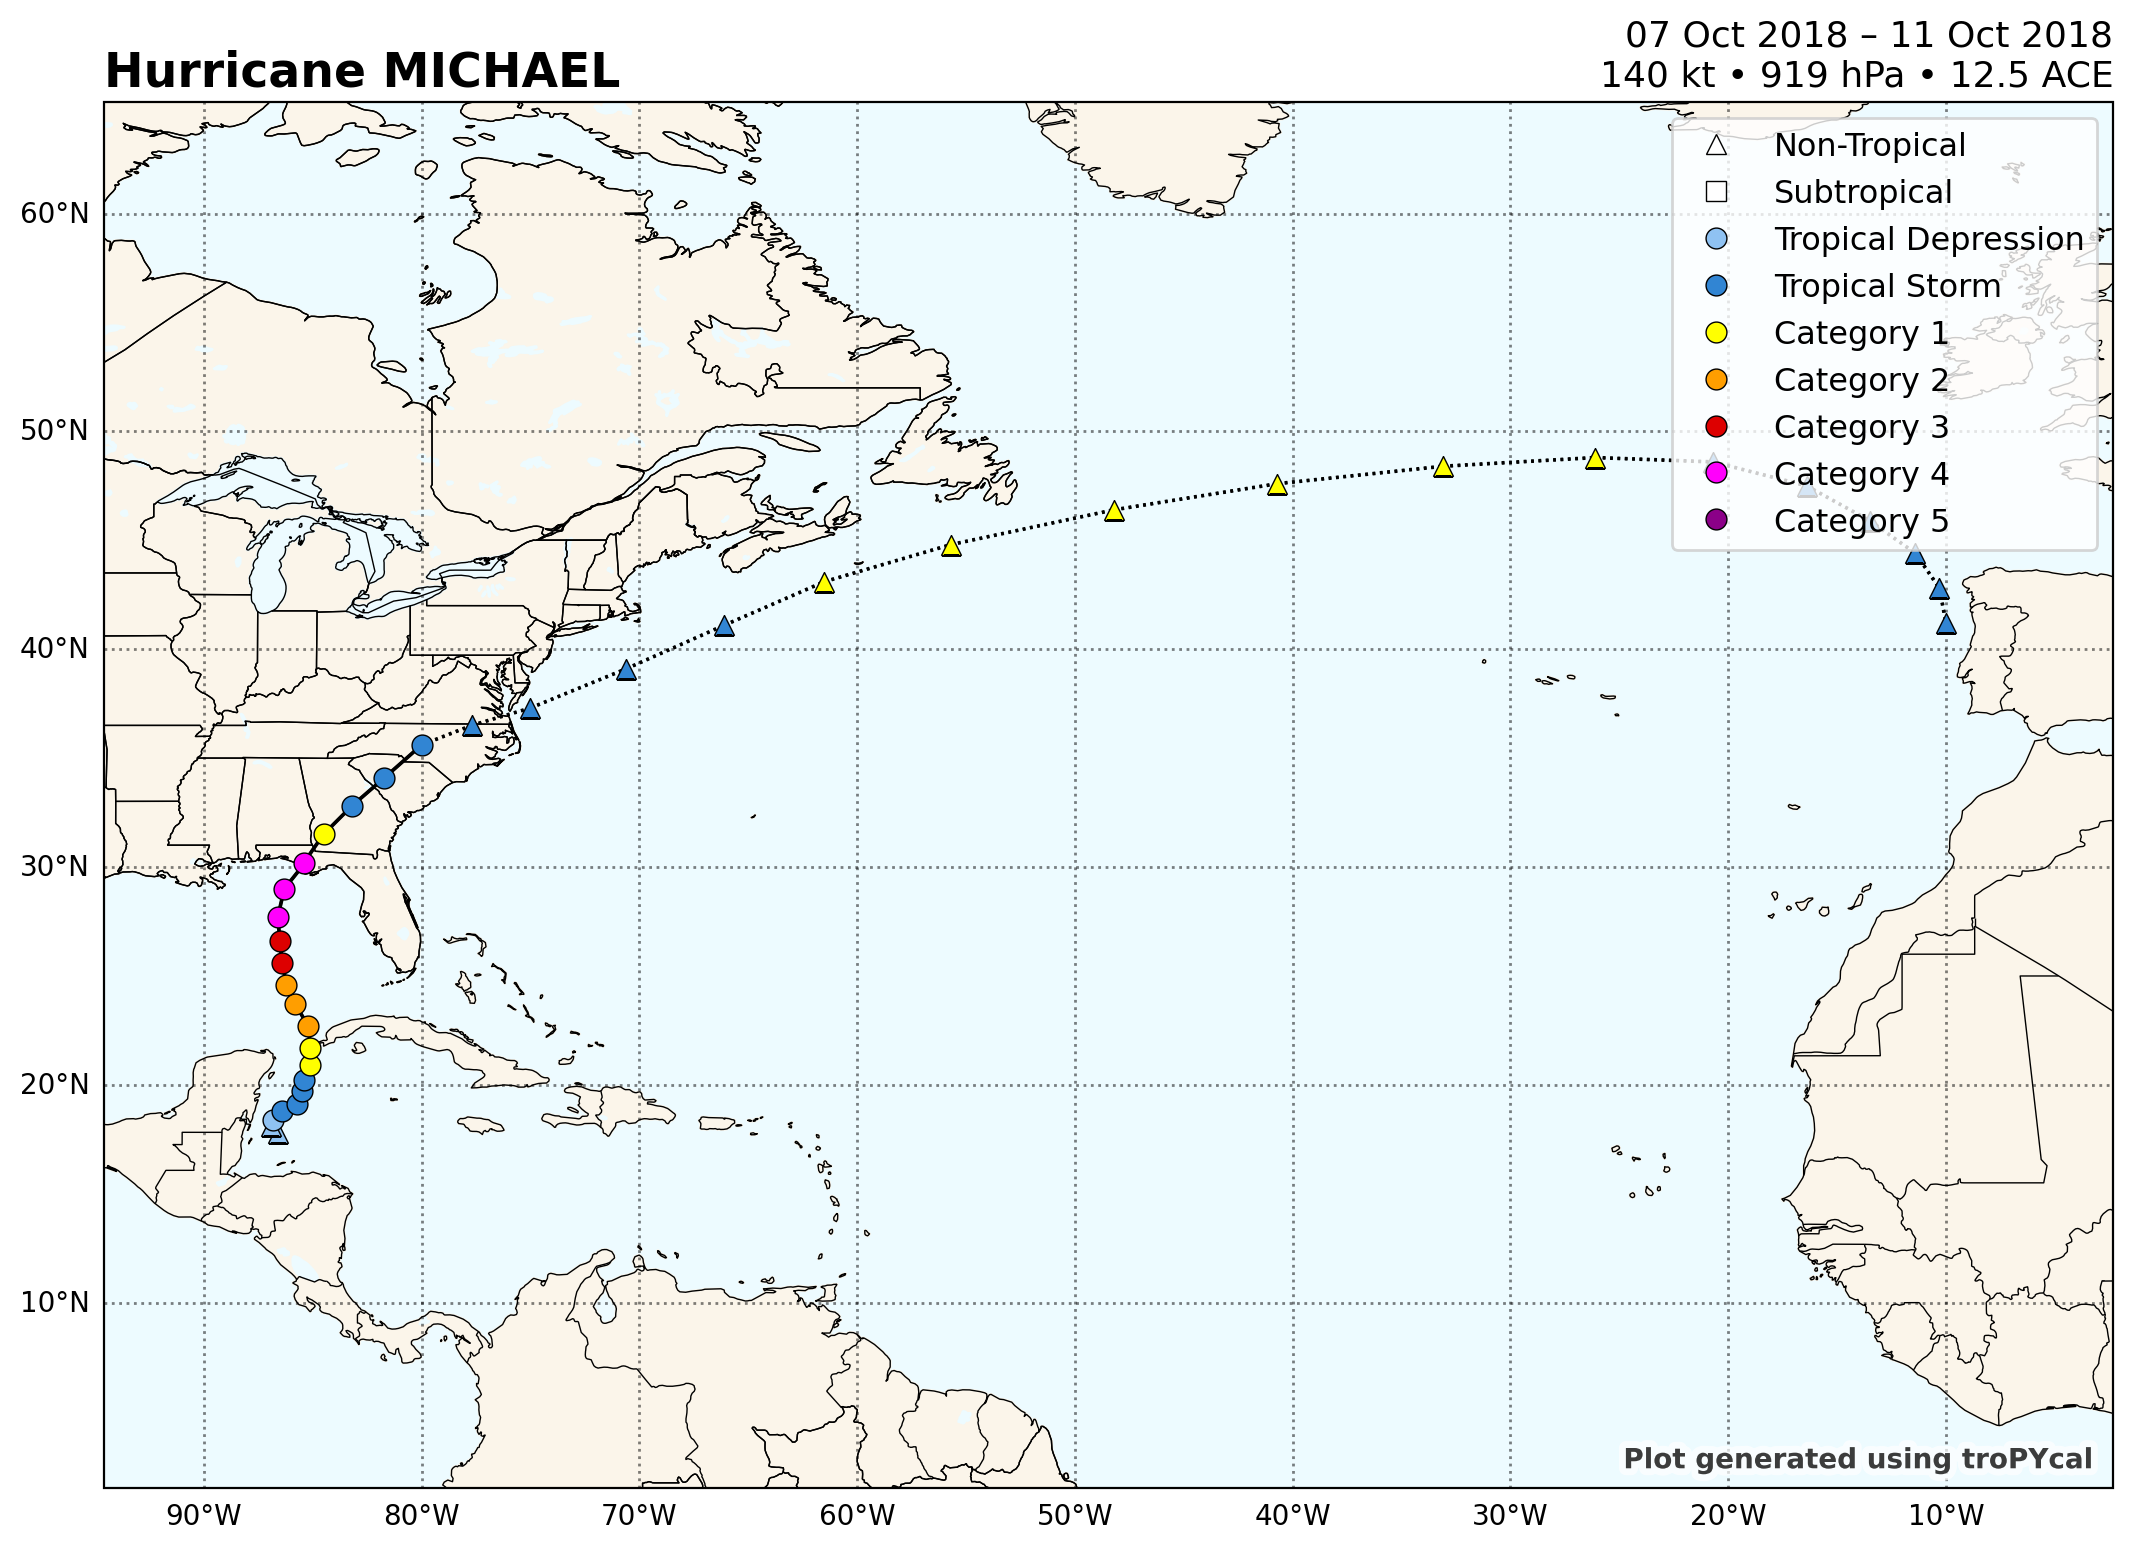

In [8]:
storm.plot()

Plot the tornado tracks associated with Michael, along with the accompanying daily practically perfect forecast (PPH):



In [11]:
# storm.plot_tors(plotPPH=True)
# this code errors out if no tornado tracks are found. 
# none are in this, so commented out for simplicity

If this storm was ever in NHC's area of responsibility, you can retrieve operational NHC forecast data for this event provided it is available. Forecast discussions date back to 1992, and forecast tracks date back to 1954.

Retrieve a single forecast discussion for Michael:



In [12]:
#Method 1: Specify date closest to desired discussion
disco = storm.get_nhc_discussion(forecast=dt.datetime(2018,10,7,0))
print(disco['text'])

#Method 2: Specify forecast discussion ID
disco = storm.get_nhc_discussion(forecast=2)
#print(disco['text']) printing this would show the same output

ZCZC MIATCDAT4 ALL
TTAA00 KNHC DDHHMM

Potential Tropical Cyclone Fourteen Discussion Number   1
NWS National Hurricane Center Miami FL       AL142018
400 PM CDT Sat Oct 06 2018

Satellite imagery and surface observations indicate that the
circulation of the low pressure area in the northwestern Caribbean
Sea is getting better defined, and that the associated convection
is becoming better organized.  While the system is currently not
well enough organized to call it a tropical depression, current
indications in the global models and the intensity guidance are that
the system will develop into a tropical cyclone within 24 h and
could bring tropical storm conditions to portions of western Cuba
and the northeastern Yucatan Peninsula.  Based on the need for
warnings and watches in these areas, advisories are being initiated
on Potential Tropical Cyclone Fourteen.

Although the intensity guidance is in excellent agreement that the
system should strengthen through the forecast period, the gl

NHC also archives forecast tracks, albeit in a different format than the official advisory data, so the operational forecast IDs here differ from the discussion IDs. As such, the forecast cone is not directly retrieved from NHC, but is generated using an algorithm that yields a cone closely resembling the official NHC cone.

Let's plot Michael's second forecast cone:



<GeoAxes: title={'left': 'Potential Tropical Cyclone FOURTEEN', 'right': '30 mph • 1004 hPa • Forecast #2\nForecast Issued: 0300 UTC 07 Oct 2018'}>

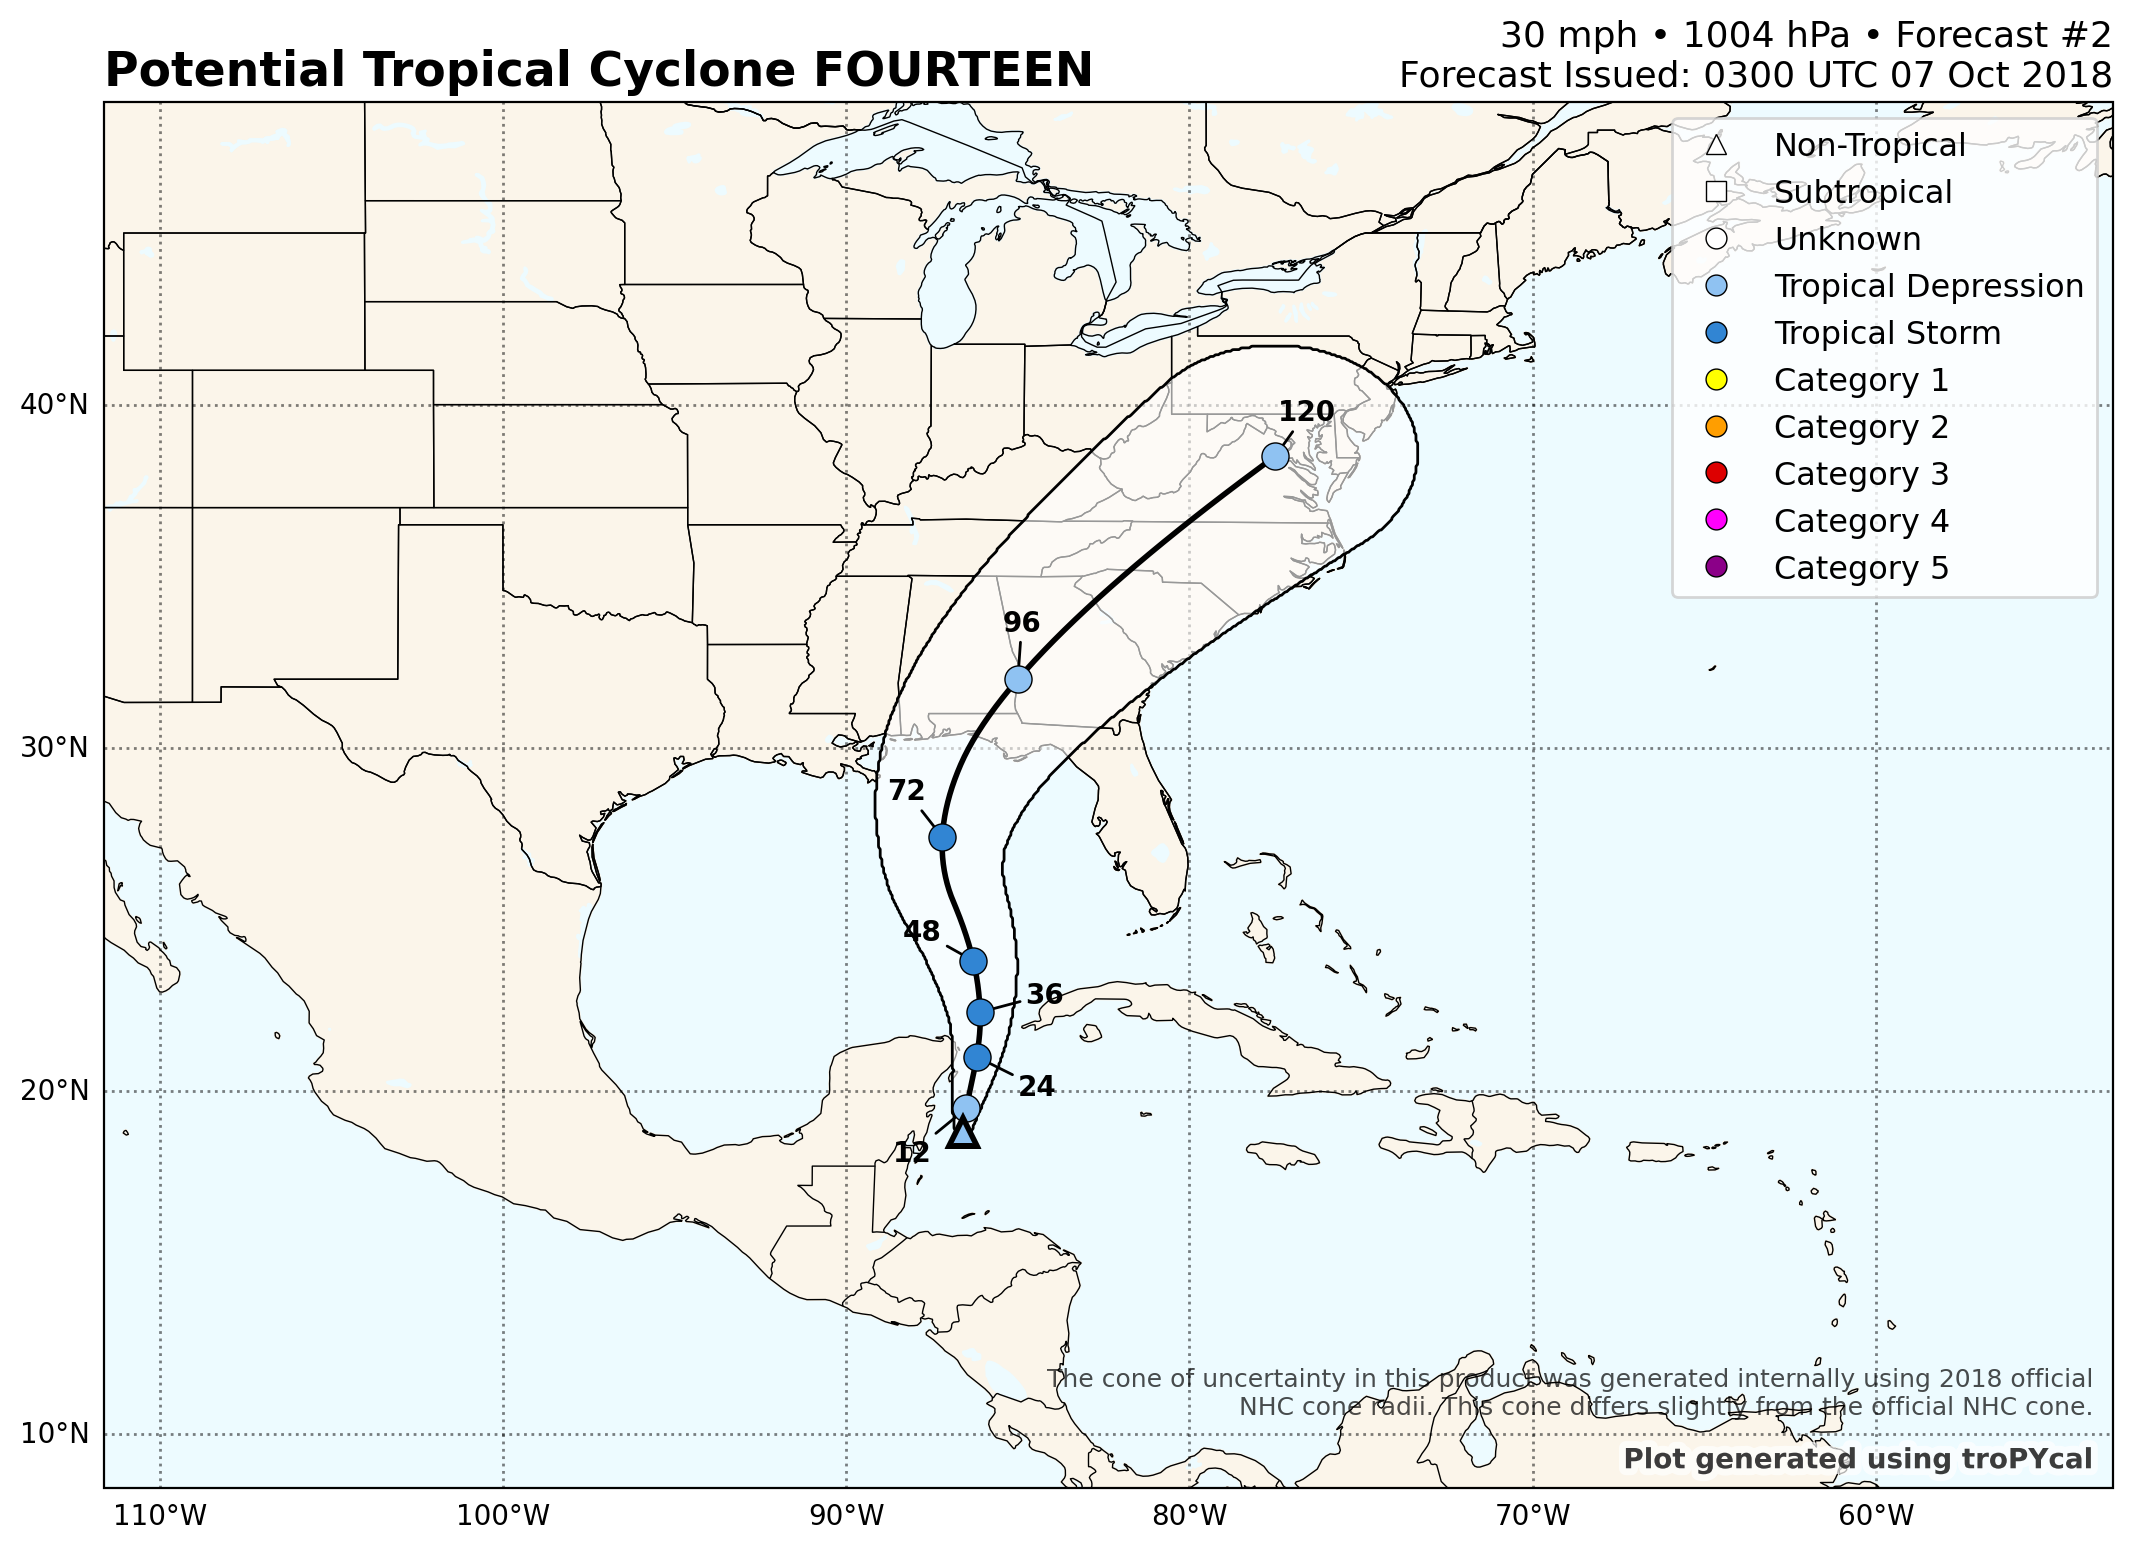

In [13]:
storm.plot_nhc_forecast(forecast=2)

Now let's look at the 12th forecast for Michael.

Note that the observed track here differs from the HURDAT2 track plotted previously! This is because this plot displays the operationally analyzed location and intensity, rather than the post-storm analysis data. This is done to account for differences between HURDAT2 and operational data.



<GeoAxes: title={'left': 'Hurricane MICHAEL', 'right': '110 mph • 965 hPa • Forecast #12\nForecast Issued: 1500 UTC 09 Oct 2018'}>

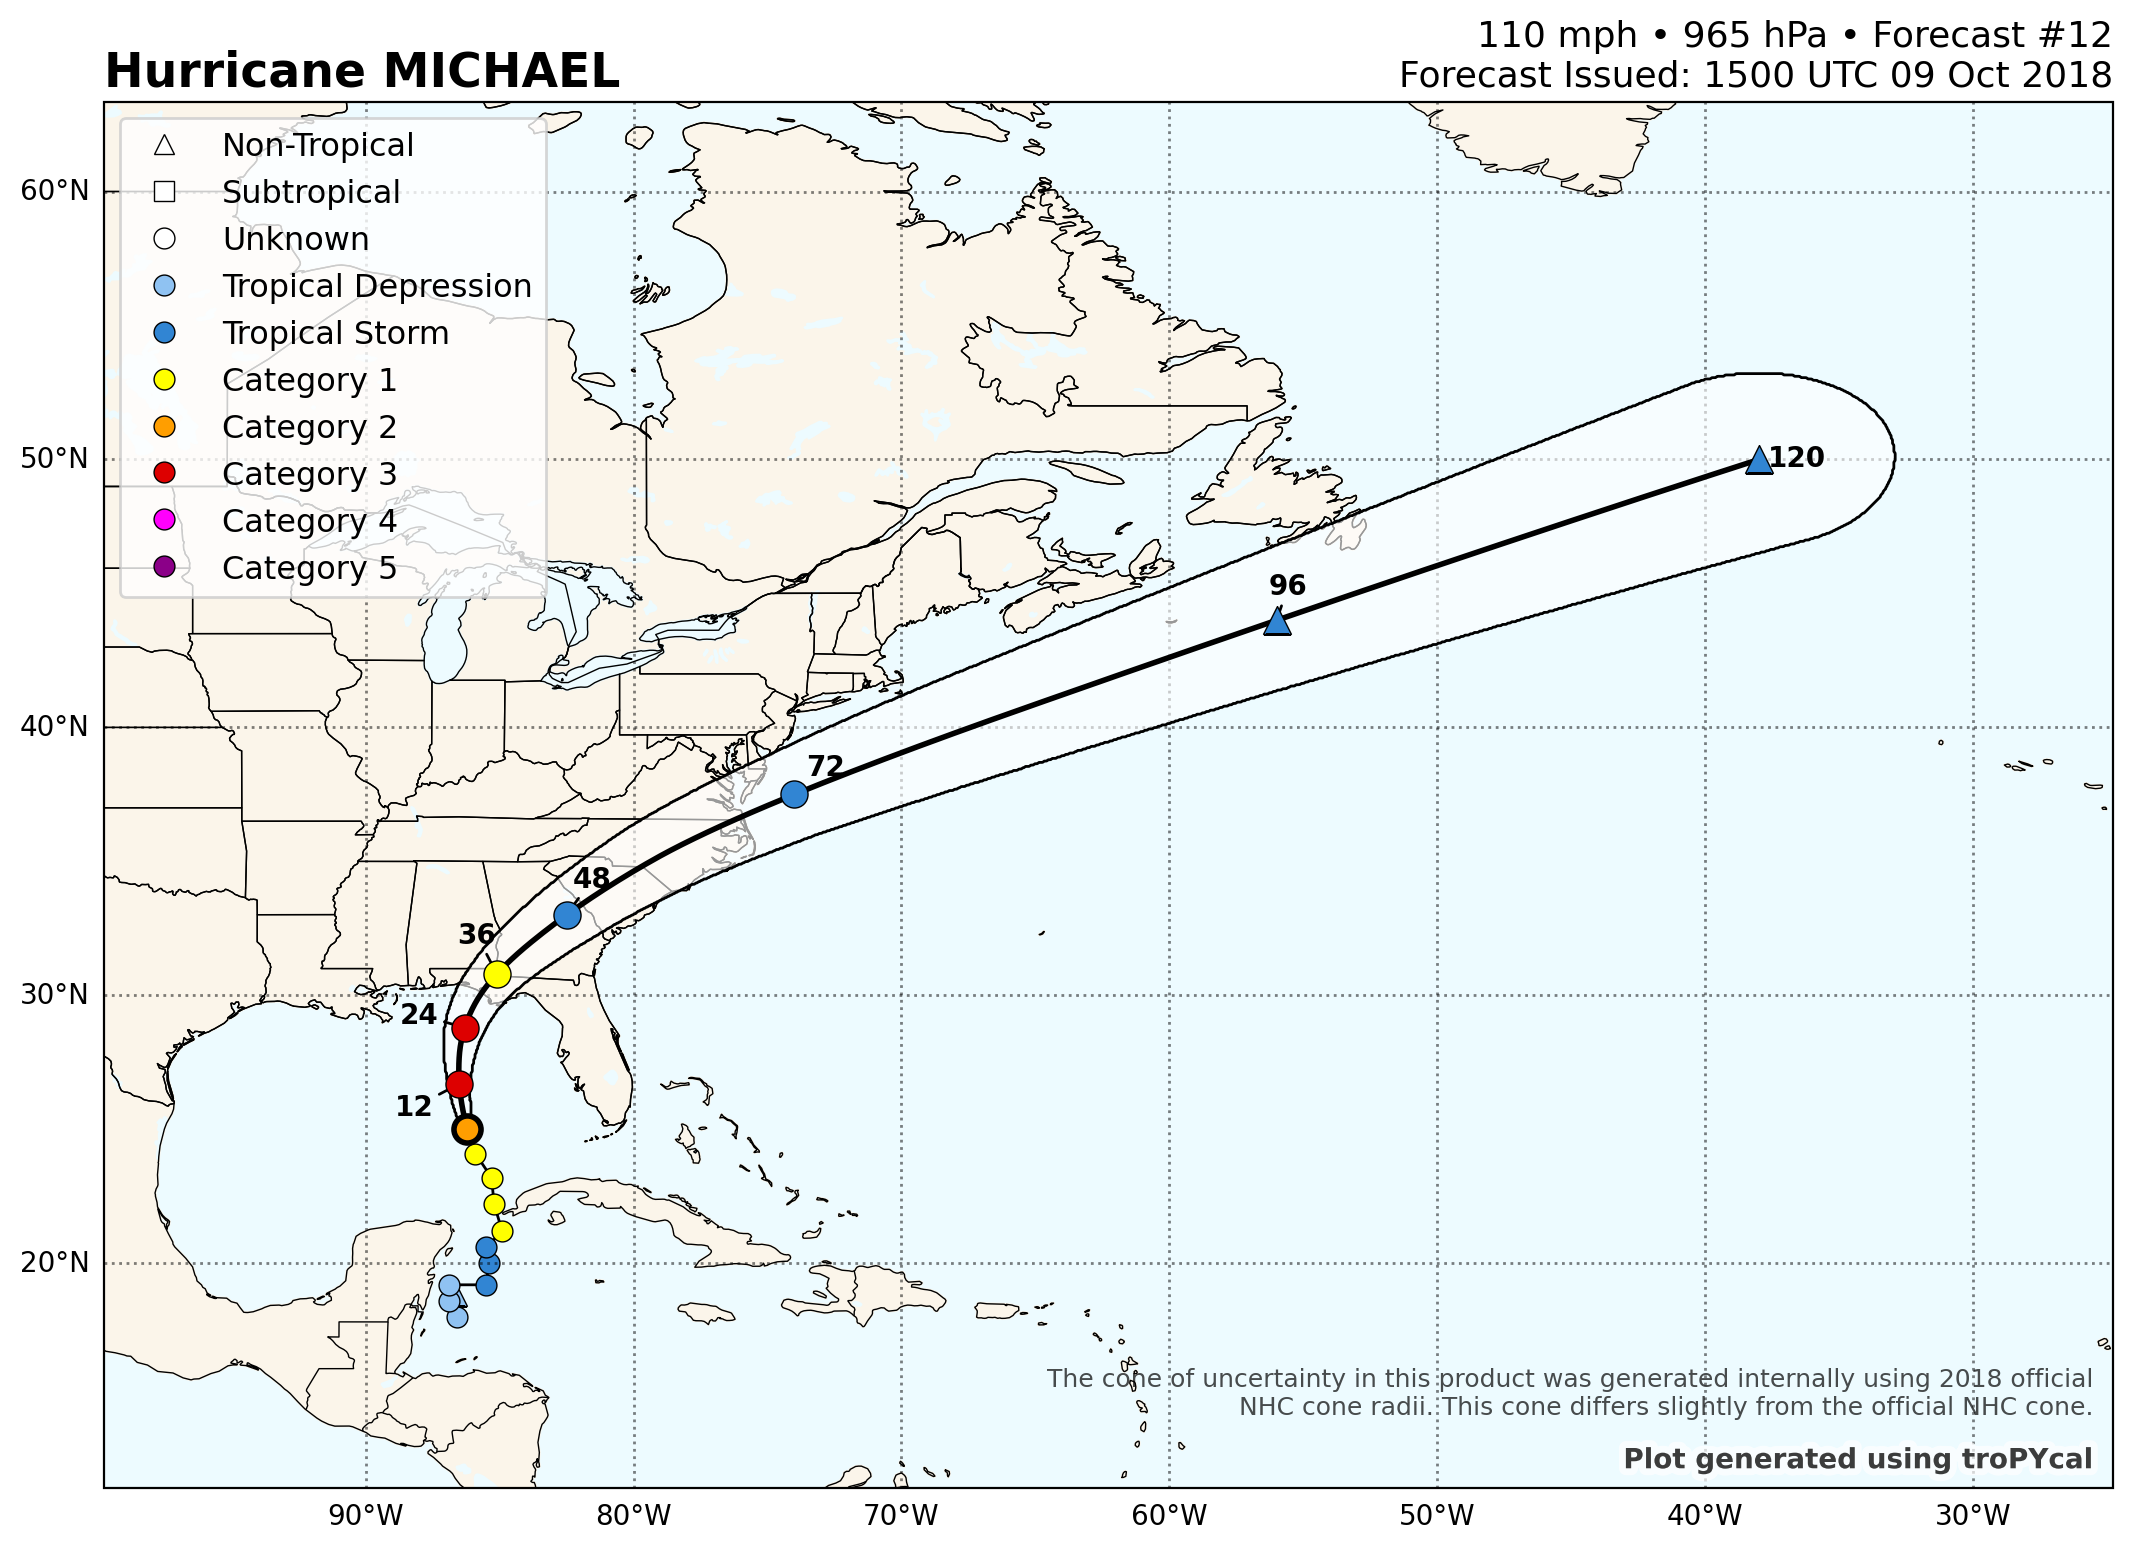

In [14]:
storm.plot_nhc_forecast(forecast=12)

To get the raw NHC forecast data, we can use the ``get_nhc_forecast_dict()`` method, and provide a date for the requested forecast.

This is a subset of the ``get_operational_forecasts()`` method, which pulls in all available forecasts whether NHC, deterministic model or ensemble members.



In [15]:
storm.get_nhc_forecast_dict(dt.datetime(2018,10,9,18))

{'init': datetime.datetime(2018, 10, 9, 18, 0),
 'fhr': [0, 3, 12, 24, 36, 48, 72, 96, 120],
 'lat': [25.5, 26.0, 27.6, 29.7, 31.8, 33.9, 39.0, 45.5, 50.0],
 'lon': [-86.4, -86.4, -86.6, -85.9, -84.1, -81.0, -70.0, -51.0, -30.0],
 'vmax': [105, 105, 110, 110, 60, 45, 55, 55, 45],
 'mslp': [nan, 957, nan, nan, nan, nan, nan, nan, nan],
 'type': ['HU', 'HU', 'HU', 'HU', 'TS', 'TS', 'TS', 'EX', 'EX'],
 'windrad': [{34: [150, 140, 70, 140],
   50: [70, 50, 30, 50],
   64: [40, 30, 20, 30]},
  {34: [150, 140, 70, 140], 50: [70, 50, 30, 50], 64: [40, 30, 20, 30]},
  {34: [150, 140, 70, 140], 50: [70, 60, 40, 50], 64: [35, 30, 25, 30]},
  {34: [130, 140, 90, 130], 50: [60, 60, 40, 50], 64: [35, 30, 25, 30]},
  {34: [90, 120, 60, 60], 50: [40, 40, 20, 20]},
  {34: [50, 140, 40, 40]},
  {34: [150, 240, 180, 70], 50: [0, 90, 90, 0]},
  {34: [0, 0, 0, 0]},
  {34: [0, 0, 0, 0]}]}

## IBTrACS Dataset

We can also read in IBTrACS data and use it the same way as we would use HURDAT2 data. There are caveats to using IBTrACS data, however, which are described more in depth in the :doc:`../data` page. We'll retrieve the global IBTrACS dataset, using the Joint Typhoon Warning Center (JTWC) data, modified with the Neumann reanalysis for southern hemisphere storms, and including a special reanalysis for Cyclone Catarina (2004) in Brazil.

<div class="alert alert-danger"><h4>Warning</h4><p>By default, IBTrACS data is read in from an online source. If you're reading in the global IBTrACS dataset, this could be quite slow.  For global IBTrACS, it is recommended to have the CSV file saved locally (`link to data`_), then set the flag ``ibtracs_url="local_path"``.</p></div>




In [16]:
ibtracs = tracks.TrackDataset(basin='all',source='ibtracs',ibtracs_mode='jtwc_neumann',catarina=True)

--> Starting to read in ibtracs data
--> Completed reading in ibtracs data (47.05 seconds)


The functionality for handling storms in IBTrACS is the same as with using HURDAT2, the only limitation being no NHC and operational model data can be accessed when using IBTrACS as the data source.

`Super Typhoon Haiyan`_ (2013) was a catastrophic storm in the West Pacific basin, having made landfall in the Philippines. With estimated sustained winds of 195 mph (170 kt), it is among one of the most powerful tropical cyclones in recorded history. We can illustrate this by making a plot of Haiyan's observed track and intensity, from JTWC data:




<GeoAxes: title={'left': 'Super Typhoon HAIYAN', 'right': '03 Nov 2013 – 11 Nov 2013\n170 kt • 895 hPa • 38.2 ACE'}>

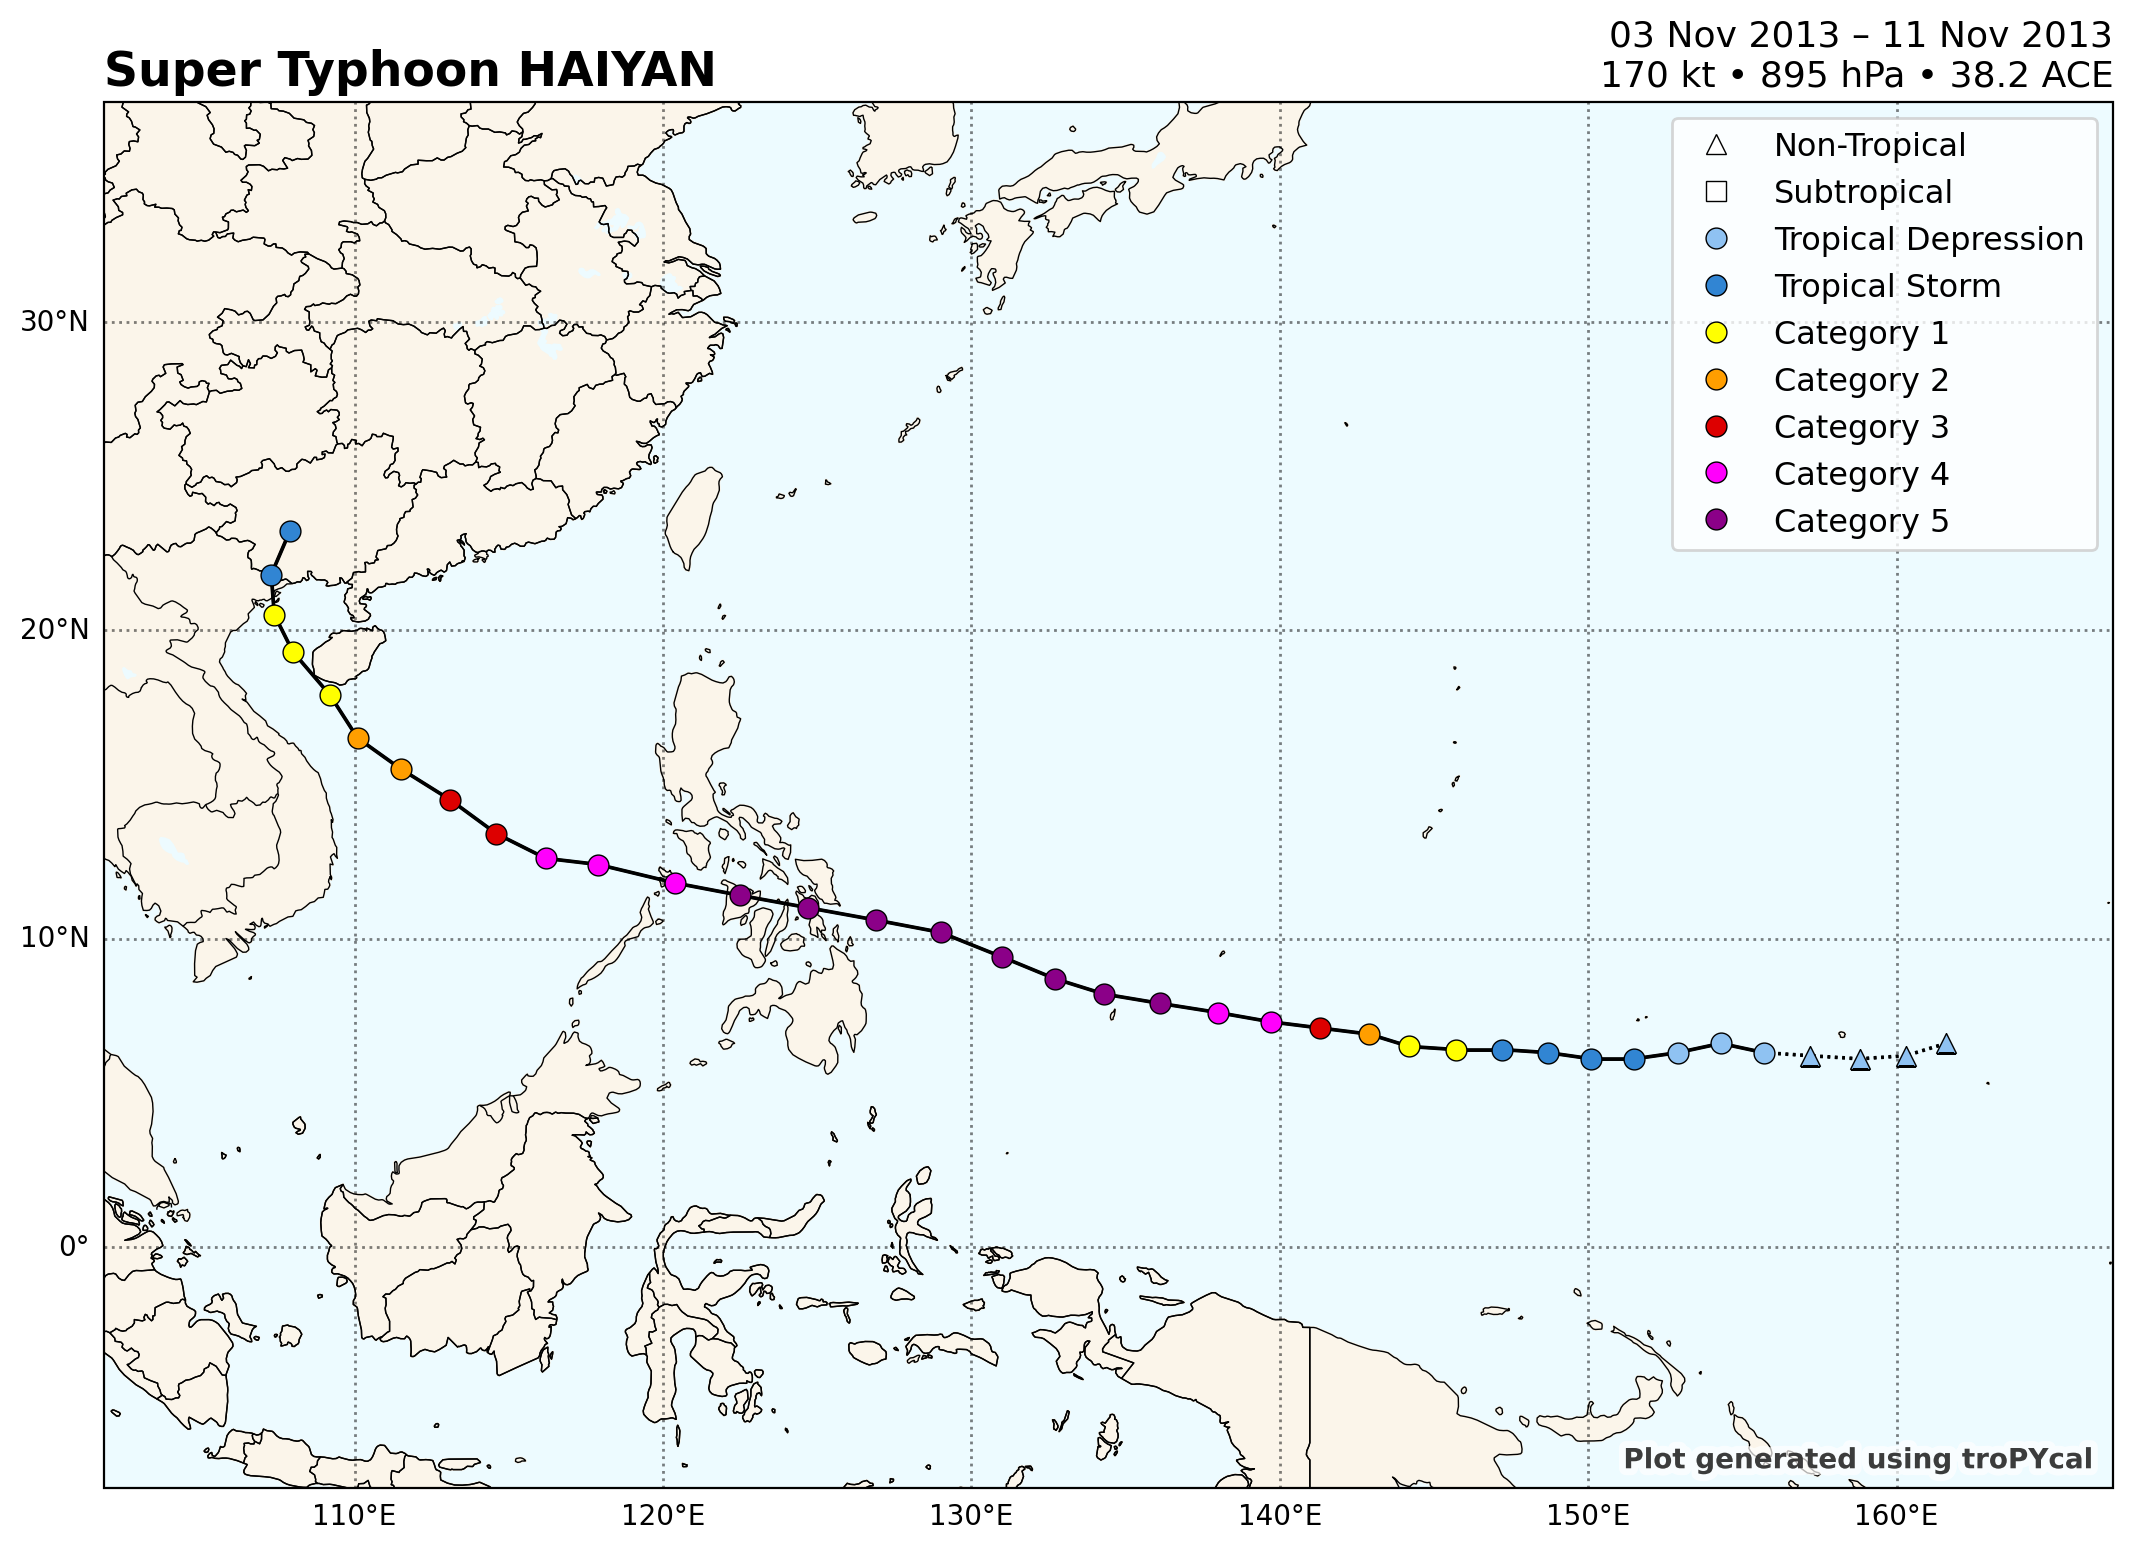

In [17]:
storm = ibtracs.get_storm(('haiyan',2013))
storm.plot()

`Cyclone Catarina`_ (2004) was an extremely rare hurricane-force tropical cyclone that developed in the South Atlantic basin, which normally doesn't see tropical cyclone activity, and subsequently made landfall in Brazil. The "Catarina" name is unofficial; it was not assigned a name in real time, and JTWC assigned it the ID "AL502004". Recall that when reading in the IBTrACS dataset previously, we set ``Catarina=True``. This read in data for Cyclone Catarina from a special post-storm reanalysis from McTaggart-Cowan et al. (2006). Let's make a plot of Catarina's observed track and intensity per this reanalysis:




<GeoAxes: title={'left': 'Cyclone CATARINA', 'right': '24 Mar 2004 – 28 Mar 2004\n85 kt • 972 hPa • 7.2 ACE'}>

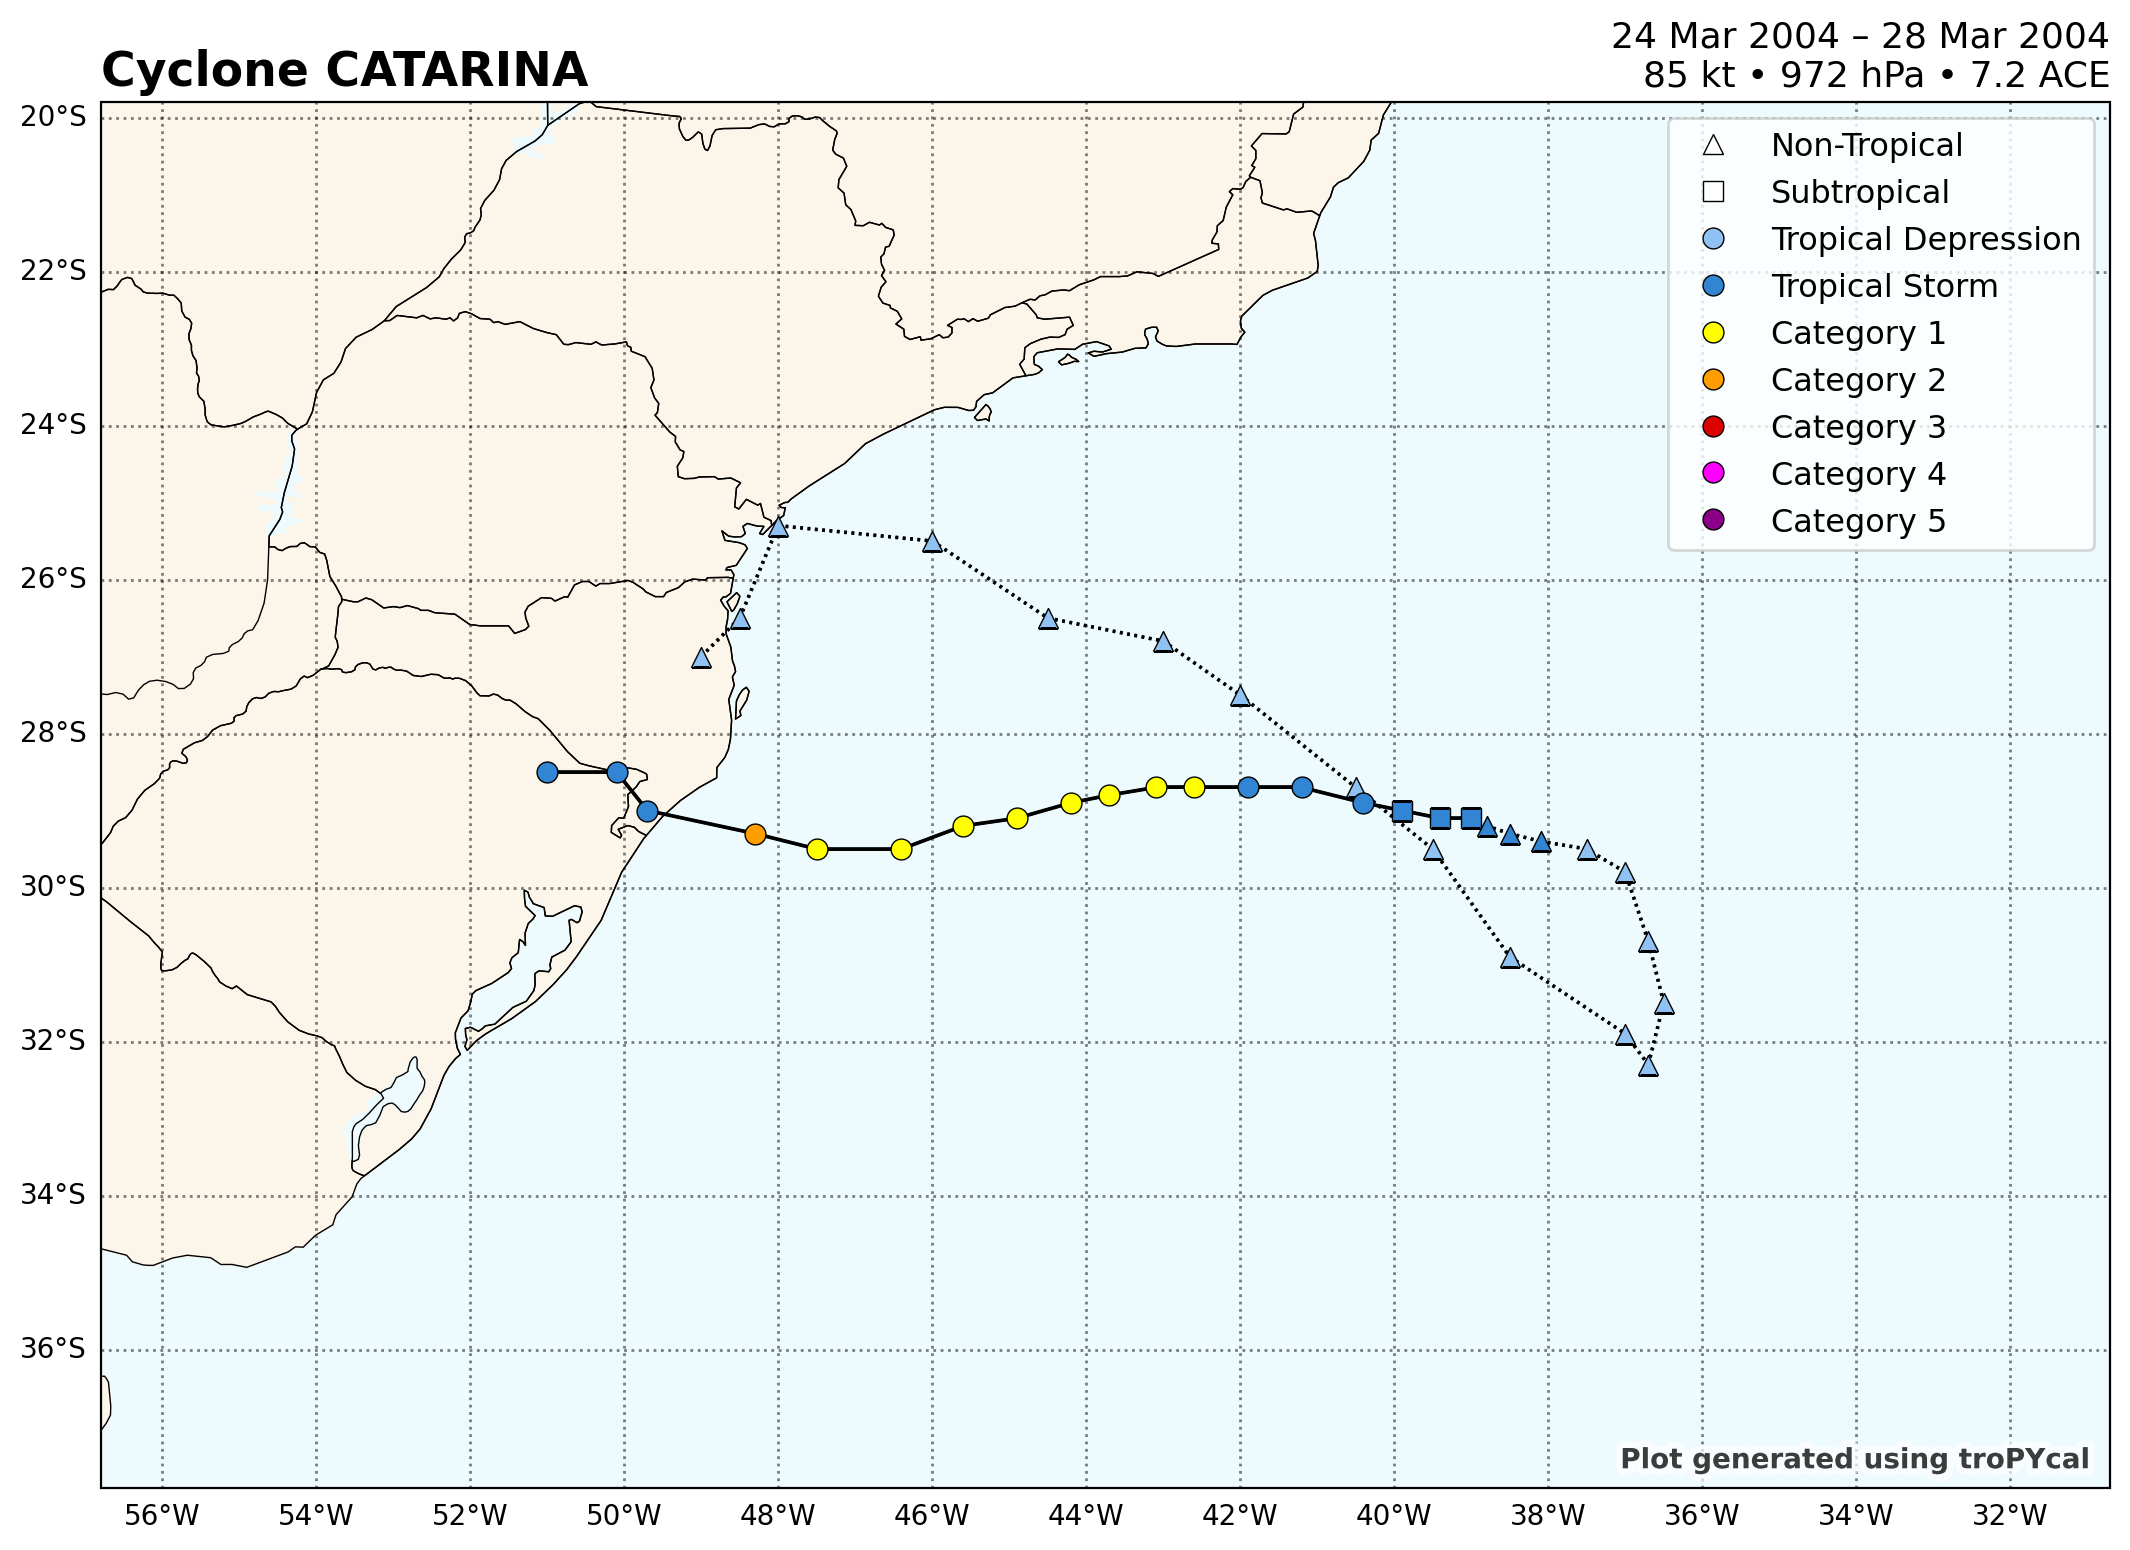

In [18]:
storm = ibtracs.get_storm(('catarina',2004))
storm.plot()

If we were to read in IBTrACS without setting ``Catarina=True`` (which sets it to False by default) and plot the track for "AL502004", we would get a noticeably different (shorter) and weaker track.

